# Info
Name:  

    Explor_fuliou_DARE_single_sol

Purpose:  

    Explore the results of the single solutions calulations from Run_fuliou 
  
Input:

    none at command line
    see methods of module

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - math
    - pdb
    - datetime
    - load_utils
  
Needed Files:

    - MOC_1solx_DARE_{vv}_{num}.mat
  
  
Modification History:

    Wrtten: Samuel LeBlanc, NASA Ames, from Santa Cruz, 2017-03-28
    Modified: 

# Load the required modules

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import matplotlib.cm as cm

In [3]:
import numpy as np

In [4]:
fp = 'C:\\Users\\sleblan2\\Research\\Calipso\\moc\\MOCsolutions_individual\\'

In [5]:
vv = 'v1'

In [6]:
num=19373

# Load the files

In [7]:
s = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=num))

In [8]:
s.keys()

['__version__', 'solutions', '__header__', 'select', '__globals__']

In [11]:
s['solutions'][0,0].dtype.names

('zmax',
 'dF_17lev_24hr',
 'zmin',
 'sza',
 'month',
 'swtoaup_aer_118_24hr',
 'year',
 'cosSZA',
 'swdn17lev_noaer',
 'diffusesfc_aer',
 'swdntoa_noaer',
 'AOD550',
 'swtoaup_aer_118_instant',
 'directsfc_aer',
 'lon',
 'swdn17lev_aer',
 'swup17lev_aer',
 'dF_sfc_24hr',
 'swnet17lev_noaer_118',
 'directsfc_noaer',
 'swnet17lev_aer_118',
 'dF_toa_24hr',
 'asy',
 'swdntoa_aer',
 'swuptoa_noaer',
 'pressure',
 'diffusesfc_noaer',
 'lat',
 'ssa',
 'day',
 'dF_sfc_all',
 'utc',
 'dF_17lev_all',
 'swdnsfc_aer_118_instant',
 'dF_toa_all',
 'swup17lev_noaer',
 'ext',
 'swtoaup_noaer_118_24hr',
 'swuptoa_aer')

# Format results in useable arrays

In [9]:
s['solutions'][0,1]['dF_toa_24hr'][0,0][0,0]

8.4561458333333324

In [10]:
dftoa = np.array([s['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))])
dfsfc = np.array([s['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0]
dftoai = np.array([s['solutions'][0,i]['dF_toa_instant'][0,0][0,0] for i in xrange(len(s['solutions'][0,:]))])
dfsfci = np.array([s['solutions'][0,i]['dF_sfc_instant'][0,0] for i in xrange(len(s['solutions'][0,:]))])[:,0,0]

In [11]:
dftoa.shape

(2944L,)

In [12]:
s['select'][0,0][1]['dF_sfc_24hr'][0][0][0,0]

-32.724895833333335

In [13]:
toa_sel = {}
sfc_sel = {}
toa_seli = {}
sfc_seli = {}
i_str = ['m1','s0','p1']
ii = 0
for ie in [-1,0,1]:
    for ia in [-1,0,1]:
        for im in [-1,0,1]:
            form = {'num':num,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
            val = '{e}{a}{s}'.format(**form)
            toa_sel[val] = s['select'][0,0][ii]['dF_toa_24hr'][0][0][0,0]
            sfc_sel[val] = s['select'][0,0][ii]['dF_sfc_24hr'][0][0][0,0]
            toa_seli[val] = s['select'][0,0][ii]['dF_toa_instant'][0][0][0,0]
            sfc_seli[val] = s['select'][0,0][ii]['dF_sfc_instant'][0][0][0,0]
            ii += 1

In [14]:
sfc_sel.keys()

['m1m1s0',
 'm1p1s0',
 's0s0m1',
 's0m1p1',
 'p1m1s0',
 's0s0s0',
 'm1s0s0',
 'm1m1p1',
 'm1s0p1',
 's0m1m1',
 'p1s0s0',
 'p1s0m1',
 's0p1s0',
 'p1m1m1',
 's0m1s0',
 'p1p1s0',
 'p1p1p1',
 'p1m1p1',
 'm1p1p1',
 'm1s0m1',
 'm1m1m1',
 'm1p1m1',
 's0p1m1',
 'p1s0p1',
 'p1p1m1',
 's0s0p1',
 's0p1p1']

## set it up for the rouces values

In [15]:
len(s['solutions'][0,:])

2944

In [16]:
s['solutions'][0,1]['ssa'][0,0][0]

array([ 0.73926569,  0.74668872,  0.7516906 ,  0.75575138,  0.75819811,
        0.76203758,  0.76939599,  0.77858261,  0.78962751,  0.80374288,
        0.81841109,  0.83227504,  0.84780628,  0.87344249,  0.8995365 ,
        0.91624778,  0.92623792,  0.92886823,  0.92746017,  0.9249966 ,
        0.92028347,  0.91368599,  0.90668119,  0.89786966,  0.88253584,
        0.85840697,  0.82309426,  0.75418288,  0.62086839,  0.34404919])

In [17]:
ssa = np.array([s['solutions'][0,i]['ssa'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

In [18]:
ssa[0]

0.79029904167936471

In [19]:
ext = np.array([s['solutions'][0,i]['ext'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

In [20]:
asy = np.array([s['solutions'][0,i]['asy'][0,0][0,8] for i in xrange(len(s['solutions'][0,:]))])

# Start to plot out results

## plot the source distribution

<IPython.core.display.Javascript object>


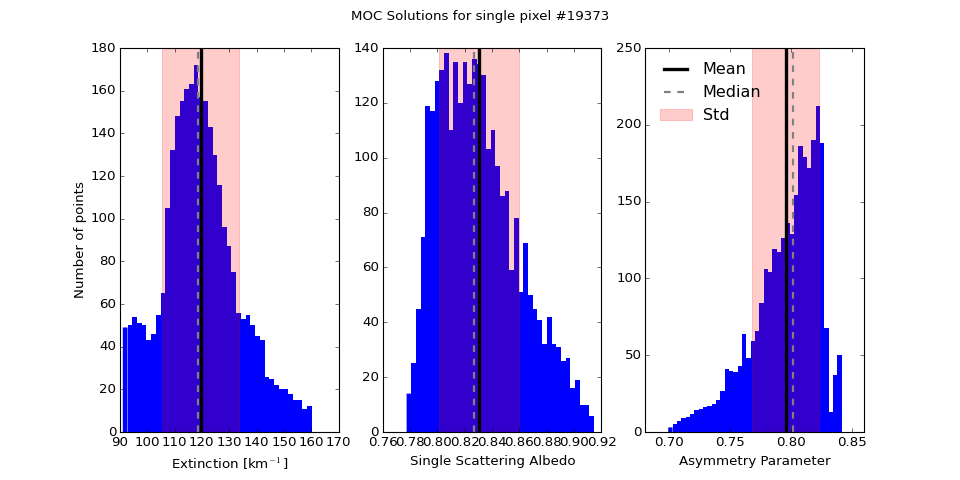

In [208]:
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].hist(ext,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext)-np.std(ext), np.mean(ext)+np.std(ext), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

ax[1].hist(ssa,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa),color='k',lw=3,label='Mean')
ax[1].axvline(np.median(ssa),color='grey',ls='--',lw=2,label='Median')
ax[1].axvspan(np.mean(ssa)-np.std(ssa), np.mean(ssa)+np.std(ssa), alpha=0.2, color='red',label='Std')
ax[1].set_xlabel('Single Scattering Albedo')

ax[2].hist(asy,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy)-np.std(asy), np.mean(asy)+np.std(asy), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num))

plt.legend(loc=2,frameon=False)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_{num}.png'.format(num=num),dpi=600,transparent=True)

## plot the DARE from theses sources

In [21]:
dftoa

array([ 8.25467014,  8.45614583,  8.01206597, ..., -3.38553819,
       -3.28255208, -3.17788194])

<IPython.core.display.Javascript object>


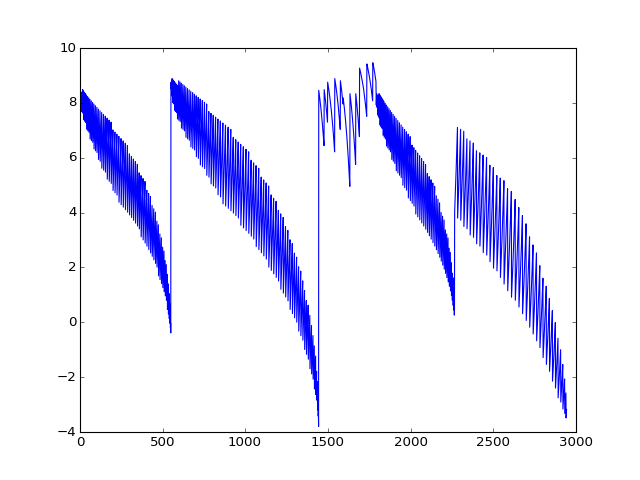

In [38]:
plt.figure()
plt.plot(dftoa)

In [22]:
a = cm.hsv(np.arange(10))

In [23]:
cs = cm.hsv(np.arange(27)/27.0)

In [24]:
for i,k in enumerate(toa_sel.keys()):
    print tuple(cs[i,:])

(1.0, 0.0, 0.0, 1.0)
(1.0, 0.20845609080903196, 0.0, 1.0)
(1.0, 0.41691218161806393, 0.0, 1.0)
(1.0, 0.64853006029476612, 0.0, 1.0)
(1.0, 0.85698615110379794, 0.0, 1.0)
(0.9113959702194997, 1.0, 0.0, 1.0)
(0.70293987941046776, 1.0, 0.0, 1.0)
(0.47132200073376579, 1.0, 0.0, 1.0)
(0.26286590992473358, 1.0, 0.0, 1.0)
(0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0)
(0.0, 1.0, 0.17720733690405541, 1.0)
(0.0, 1.0, 0.40882375639585572, 1.0)
(0.0, 1.0, 0.61727853393847598, 1.0)
(0.0, 1.0, 0.84889495343027632, 1.0)
(0.0, 0.94264990772343771, 1.0, 1.0)
(0.0, 0.7110320290467349, 1.0, 1.0)
(0.0, 0.50257593823770308, 1.0, 1.0)
(0.0, 0.27095805956100094, 1.0, 1.0)
(0.0, 0.062501968751969006, 1.0, 1.0)
(0.16911590992473247, 0.0, 1.0, 1.0)
(0.37757200073376529, 0.0, 1.0, 1.0)
(0.60918987941046776, 0.0, 1.0, 1.0)
(0.81764597021949992, 0.0, 1.0, 1.0)
(0.99558794963206743, 0.0, 0.94632410073586526, 1.0)
(1.0, 0.0, 0.74228006029476601, 1.0)
(1.0, 0.0, 0.51066218161806387, 1.0)
(1.0, 0.0, 0.3022060

### Plot the 24h averages

<IPython.core.display.Javascript object>


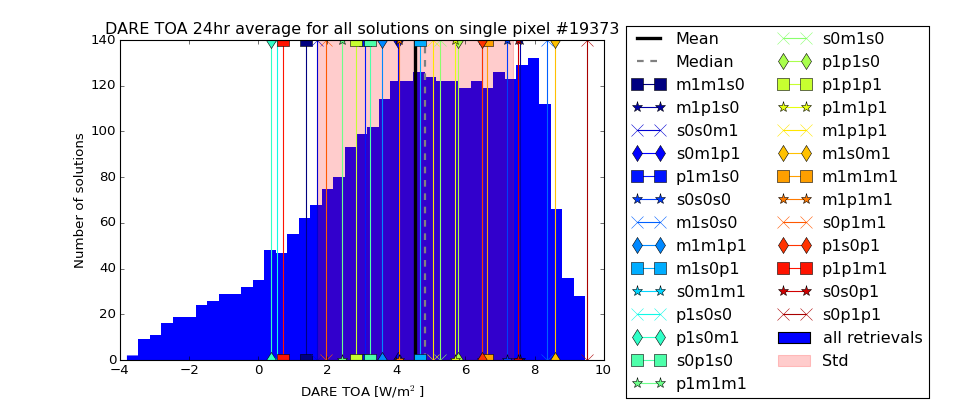

In [21]:
plt.figure(figsize=(12,5))
plt.hist(dftoa,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoa)-np.std(dftoa), np.mean(dftoa)+np.std(dftoa), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA 24hr average for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_24h_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


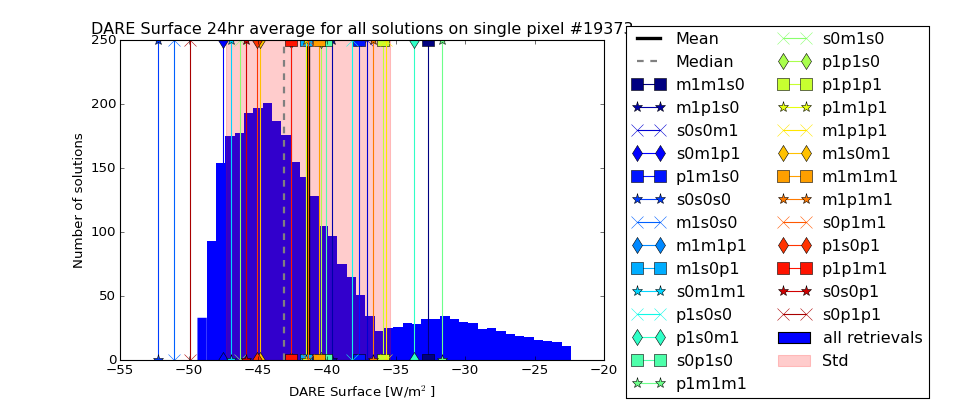

In [22]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_sel.keys()):
    plt.axvline(sfc_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc)-np.std(dfsfc), np.mean(dfsfc)+np.std(dfsfc), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface 24hr average for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_24h_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


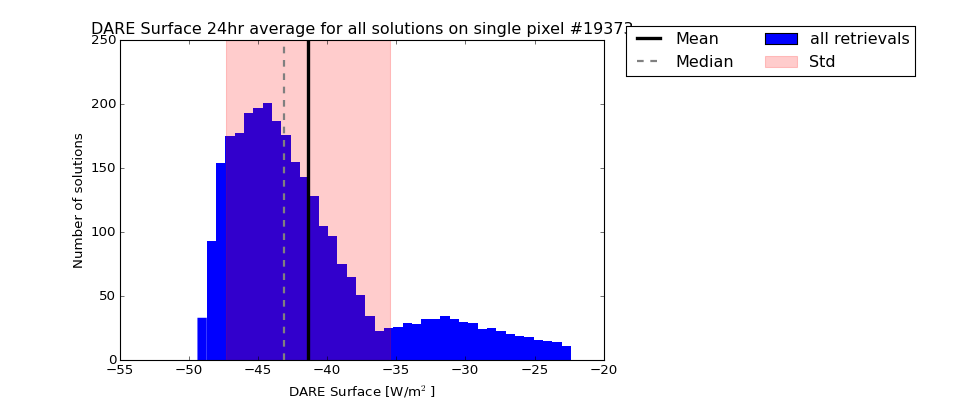

In [23]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
#for i,k in enumerate(sfc_sel.keys()):
#    plt.axvline(sfc_sel[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc)-np.std(dfsfc), np.mean(dfsfc)+np.std(dfsfc), alpha=0.2, color='red',label='Std')
plt.xlim(-55,-20)
plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface 24hr average for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)
plt.savefig(fp+'plot\\DARE_SFC_24h_{num}_nosup.png'.format(num=num),dpi=600,transparent=True)

### Plot the instantaneous values

<IPython.core.display.Javascript object>


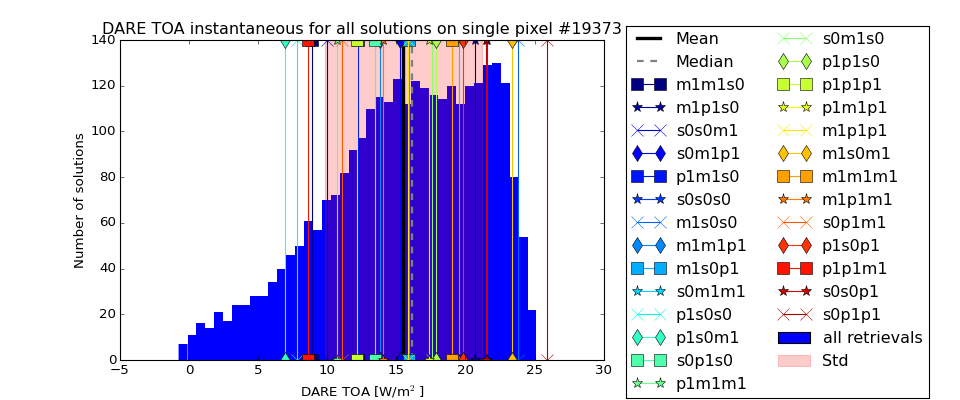

In [24]:
plt.figure(figsize=(12,5))
plt.hist(dftoai,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoai),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoai),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_seli[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoai)-np.std(dftoai), np.mean(dftoai)+np.std(dftoai), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA instantaneous for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_instantaneous_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


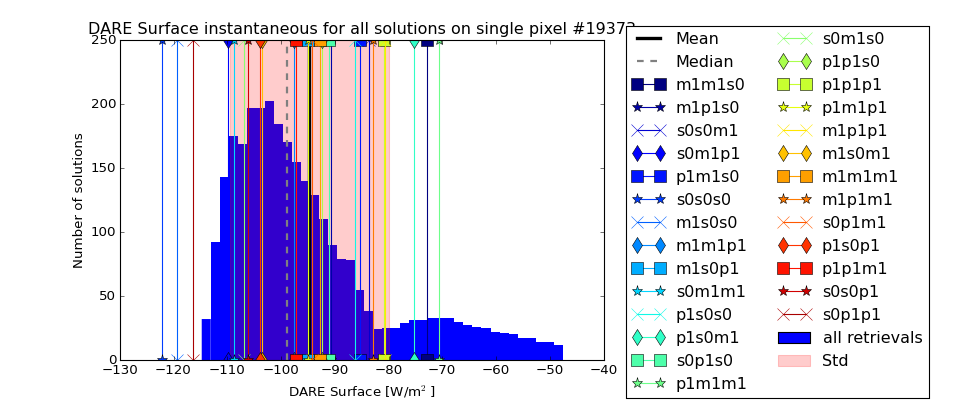

In [25]:
plt.figure(figsize=(12,5))
plt.hist(dfsfci,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfci),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfci),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_seli.keys()):
    plt.axvline(sfc_seli[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfci)-np.std(dfsfci), np.mean(dfsfci)+np.std(dfsfci), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface instantaneous for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_instantaneous_{num}.png'.format(num=num),dpi=600,transparent=True)

# Redo the analysis for number 22134

In [25]:
num2 = 22134

In [26]:
s2 = sio.loadmat(fp+'MOC_1solx_DARE_{vv}_{num}.mat'.format(vv=vv,num=num2))

In [27]:
dftoa2 = np.array([s2['solutions'][0,i]['dF_toa_24hr'][0,0][0,0] for i in xrange(len(s2['solutions'][0,:]))])
dfsfc2 = np.array([s2['solutions'][0,i]['dF_sfc_24hr'][0,0] for i in xrange(len(s2['solutions'][0,:]))])[:,0,0]
dftoai2 = np.array([s2['solutions'][0,i]['dF_toa_instant'][0,0][0,0] for i in xrange(len(s2['solutions'][0,:]))])
dfsfci2 = np.array([s2['solutions'][0,i]['dF_sfc_instant'][0,0] for i in xrange(len(s2['solutions'][0,:]))])[:,0,0]

In [28]:
toa_sel2 = {}
sfc_sel2 = {}
toa_seli2 = {}
sfc_seli2 = {}
i_str = ['m1','s0','p1']
ii = 0
for ie in [-1,0,1]:
    for ia in [-1,0,1]:
        for im in [-1,0,1]:
            form = {'num':num,'e':i_str[ie+1],'a':i_str[ia+1],'s':i_str[im+1]}
            val = '{e}{a}{s}'.format(**form)
            toa_sel2[val] = s2['select'][0,0][ii]['dF_toa_24hr'][0][0][0,0]
            sfc_sel2[val] = s2['select'][0,0][ii]['dF_sfc_24hr'][0][0][0,0]
            toa_seli2[val] = s2['select'][0,0][ii]['dF_toa_instant'][0][0][0,0]
            sfc_seli2[val] = s2['select'][0,0][ii]['dF_sfc_instant'][0][0][0,0]
            ii += 1

In [29]:
ssa2 = np.array([s2['solutions'][0,i]['ssa'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])
ext2 = np.array([s2['solutions'][0,i]['ext'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])
asy2 = np.array([s2['solutions'][0,i]['asy'][0,0][0,8] for i in xrange(len(s2['solutions'][0,:]))])

<IPython.core.display.Javascript object>


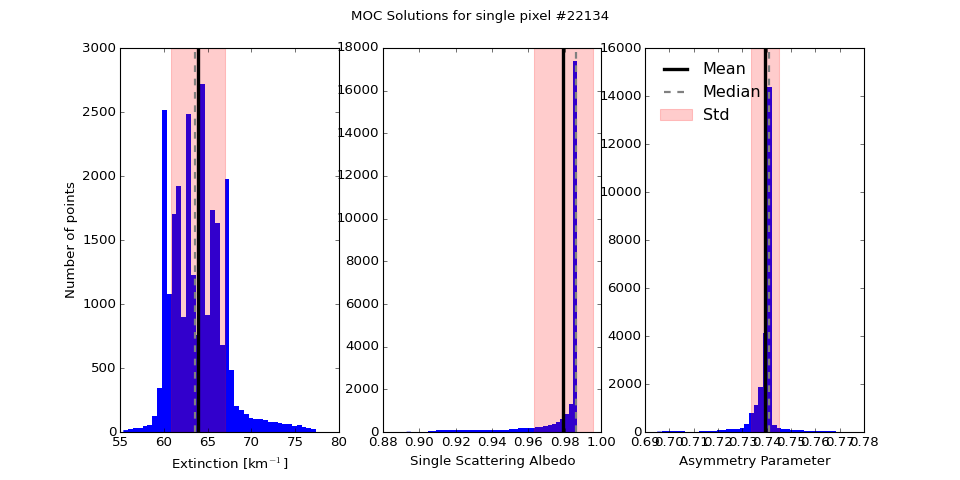

In [30]:
fig,ax = plt.subplots(1,3,figsize=(12,6))

ax[0].hist(ext2,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext2),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext2),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext2)-np.std(ext2), np.mean(ext2)+np.std(ext2), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

ax[1].hist(ssa2,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa2),color='k',lw=3,label='Mean')
ax[1].axvline(np.median(ssa2),color='grey',ls='--',lw=2,label='Median')
ax[1].axvspan(np.mean(ssa2)-np.std(ssa2), np.mean(ssa2)+np.std(ssa2), alpha=0.2, color='red',label='Std')
ax[1].set_xlabel('Single Scattering Albedo')

ax[2].hist(asy2,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy2),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy2),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy2)-np.std(asy2), np.mean(asy2)+np.std(asy2), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num2))

plt.legend(loc=2,frameon=False)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


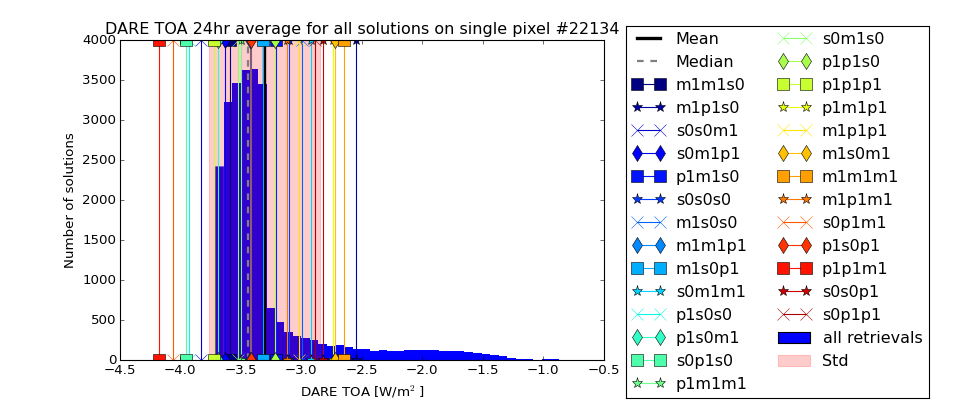

In [42]:
plt.figure(figsize=(12,5))
plt.hist(dftoa2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_sel.keys()):
    plt.axvline(toa_sel2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoa2)-np.std(dftoa2), np.mean(dftoa2)+np.std(dftoa2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA 24hr average for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_24h_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


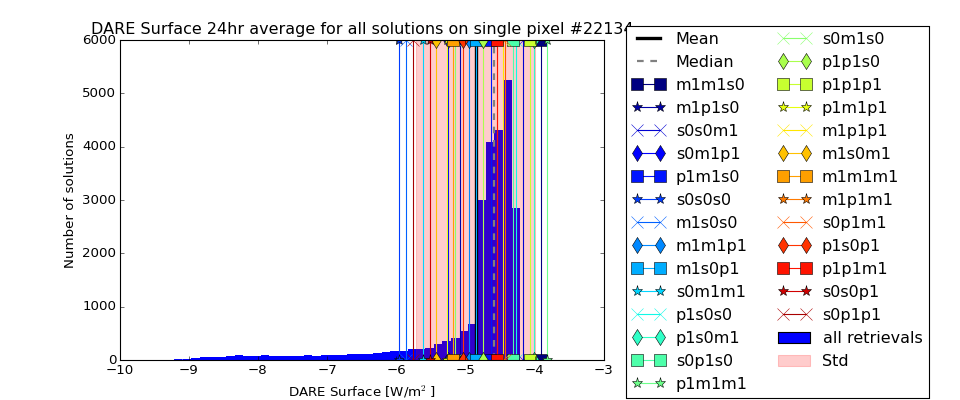

In [32]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_sel2.keys()):
    plt.axvline(sfc_sel2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfc2)-np.std(dfsfc2), np.mean(dfsfc2)+np.std(dfsfc2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface 24hr average for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_24h_{num}.png'.format(num=num2),dpi=600,transparent=True)

In [33]:
len(ext2)

24860

<IPython.core.display.Javascript object>


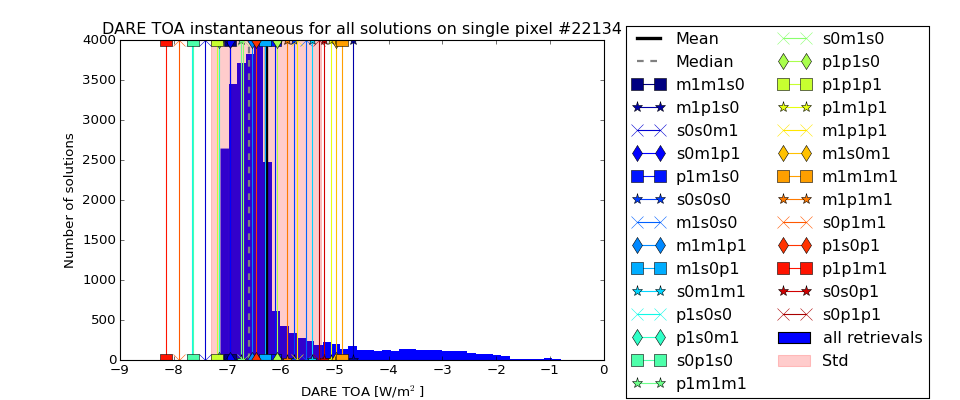

In [34]:
plt.figure(figsize=(12,5))
plt.hist(dftoai2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoai2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoai2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(toa_seli.keys()):
    plt.axvline(toa_seli2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dftoai2)-np.std(dftoai2), np.mean(dftoai2)+np.std(dftoai2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA instantaneous for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_TOA_instant_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


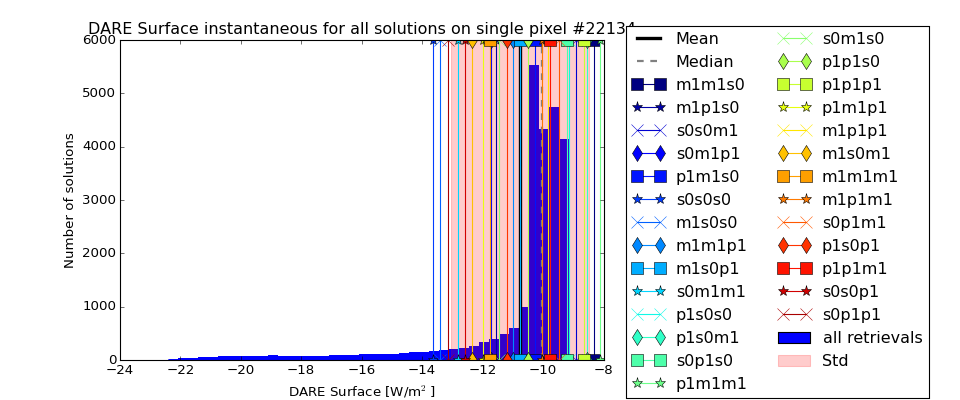

In [35]:
plt.figure(figsize=(12,5))
plt.hist(dfsfci2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfci2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfci2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(27)/27.0)
ms = ['s','*','x','d']
for i,k in enumerate(sfc_seli2.keys()):
    plt.axvline(sfc_seli2[k],lw=1,label=k,ls='-',color=tuple(cs[i,:]),marker=ms[i%4],ms=10)
    
plt.axvspan(np.mean(dfsfci2)-np.std(dfsfci2), np.mean(dfsfci2)+np.std(dfsfci2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface instantaneous for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=2)

plt.savefig(fp+'plot\\DARE_SFC_instant_{num}.png'.format(num=num2),dpi=600,transparent=True)

# Print out all the resulting values

In [43]:
print 'TOA {}'.format(num)
print 'Mean:',np.mean(dftoa)
print 'Median',np.median(dftoa)
print 'Mean+std:',np.mean(dftoa)+np.std(dftoa)
print 'Mean-std:',np.mean(dftoa)-np.std(dftoa)
for k in np.sort(toa_sel.keys()):
    print k,toa_sel[k]

TOA 19373
Mean: 4.53364175253
Median 4.84239583333
Mean+std: 7.37597248001
Mean-std: 1.69131102504
m1m1m1 6.63815972222
m1m1p1 3.58342013889
m1m1s0 1.39503472222
m1p1m1 4.07274305556
m1p1p1 5.05875
m1p1s0 7.58371527778
m1s0m1 8.58142361111
m1s0p1 4.68083333333
m1s0s0 8.35876736111
p1m1m1 2.42310763889
p1m1p1 5.69560763889
p1m1s0 3.09024305556
p1p1m1 0.713194444444
p1p1p1 2.8428125
p1p1s0 5.78300347222
p1s0m1 0.371111111111
p1s0p1 6.46670138889
p1s0s0 0.546614583333
s0m1m1 6.47614583333
s0m1p1 4.04737847222
s0m1s0 5.25440972222
s0p1m1 1.974375
s0p1p1 9.51640625
s0p1s0 3.2421875
s0s0m1 1.6925
s0s0p1 7.52685763889
s0s0s0 7.20473958333


In [44]:
print 'TOA {}'.format(num)
print 'Mean:',np.mean(dfsfc)
print 'Median',np.median(dfsfc)
print 'Mean+std:',np.mean(dfsfc)+np.std(dfsfc)
print 'Mean-std:',np.mean(dfsfc)-np.std(dfsfc)
for k in np.sort(toa_sel.keys()):
    print k,toa_sel[k],sfc_sel[k]

TOA 19373
Mean: -41.4133643699
Median -43.0968229167
Mean+std: -35.473165998
Mean-std: -47.3535627417
m1m1m1 6.63815972222 -40.5838020833
m1m1p1 3.58342013889 -42.6557638889
m1m1s0 1.39503472222 -32.7248958333
m1p1m1 4.07274305556 -36.7030902778
m1p1p1 5.05875 -35.7363368056
m1p1s0 7.58371527778 -39.655625
m1s0m1 8.58142361111 -44.8683159722
m1s0p1 4.68083333333 -41.5692534722
m1s0s0 8.35876736111 -51.09734375
p1m1m1 2.42310763889 -31.7183159722
p1m1p1 5.69560763889 -41.5101388889
p1m1s0 3.09024305556 -37.6676909722
p1p1m1 0.713194444444 -42.6344270833
p1p1p1 2.8428125 -35.9614756944
p1p1s0 5.78300347222 -40.4784375
p1s0m1 0.371111111111 -33.7286805556
p1s0p1 6.46670138889 -45.1071701389
p1s0s0 0.546614583333 -38.22890625
s0m1m1 6.47614583333 -46.9563541667
s0m1p1 4.04737847222 -47.5214236111
s0m1s0 5.25440972222 -46.3173611111
s0p1m1 1.974375 -41.3783159722
s0p1p1 9.51640625 -49.9383506944
s0p1s0 3.2421875 -40.1162847222
s0s0m1 1.6925 -37.0974826389
s0s0p1 7.52685763889 -45.9139930556

In [45]:
for k in np.sort(toa_sel.keys()):
    print sfc_sel[k]

-40.5838020833
-42.6557638889
-32.7248958333
-36.7030902778
-35.7363368056
-39.655625
-44.8683159722
-41.5692534722
-51.09734375
-31.7183159722
-41.5101388889
-37.6676909722
-42.6344270833
-35.9614756944
-40.4784375
-33.7286805556
-45.1071701389
-38.22890625
-46.9563541667
-47.5214236111
-46.3173611111
-41.3783159722
-49.9383506944
-40.1162847222
-37.0974826389
-45.9139930556
-52.2517013889


In [46]:
print 'TOA, SFC {}'.format(num2)
print 'Mean:',np.mean(dftoa2),np.mean(dfsfc2)
print 'Median',np.median(dftoa2),np.median(dfsfc2)
print 'Mean+std:',np.mean(dftoa2)+np.std(dftoa2),np.mean(dfsfc2)+np.std(dfsfc2)
print 'Mean-std:',np.mean(dftoa2)-np.std(dftoa2),np.mean(dfsfc2)-np.std(dfsfc2)
for k in np.sort(toa_sel2.keys()):
    print k,toa_sel2[k],sfc_sel2[k]

TOA, SFC 22134
Mean: -3.30813839236 -4.85165741695
Median -3.44208333333 -4.58329861111
Mean+std: -2.84836606576 -3.99506474986
Mean-std: -3.76791071896 -5.70825008405
m1m1m1 -2.64324652778 -5.17269097222
m1m1p1 -3.42291666667 -4.94640625
m1m1s0 -3.59076388889 -3.91128472222
m1p1m1 -3.11534722222 -4.54322916667
m1p1p1 -3.02147569444 -4.45050347222
m1p1s0 -2.55126736111 -5.08175347222
m1s0m1 -2.71817708333 -5.41881944444
m1s0p1 -3.32130208333 -4.84569444444
m1s0s0 -2.99131944444 -5.86008680556
p1m1m1 -3.49517361111 -3.81623263889
p1m1p1 -2.73470486111 -5.26328125
p1m1s0 -3.20875 -4.63612847222
p1p1m1 -4.17770833333 -4.54001736111
p1p1p1 -3.72430555556 -4.06704861111
p1p1s0 -3.21934027778 -4.74449652778
p1s0m1 -3.68631944444 -4.00595486111
p1s0p1 -3.41581597222 -5.03730902778
p1s0s0 -3.93276041667 -4.27369791667
s0m1m1 -2.91729166667 -5.61519097222
s0m1p1 -3.63477430556 -5.25576388889
s0m1s0 -3.52552083333 -5.14626736111
s0p1m1 -4.06519097222 -4.42876736111
s0p1p1 -2.88392361111 -5.75369

In [47]:
for k in np.sort(toa_sel2.keys()):
    print toa_sel2[k]

-2.64324652778
-3.42291666667
-3.59076388889
-3.11534722222
-3.02147569444
-2.55126736111
-2.71817708333
-3.32130208333
-2.99131944444
-3.49517361111
-2.73470486111
-3.20875
-4.17770833333
-3.72430555556
-3.21934027778
-3.68631944444
-3.41581597222
-3.93276041667
-2.91729166667
-3.63477430556
-3.52552083333
-4.06519097222
-2.88392361111
-3.95203125
-3.82852430556
-2.81789930556
-3.09855902778


In [48]:
for k in np.sort(toa_sel2.keys()):
    print sfc_sel2[k]

-5.17269097222
-4.94640625
-3.91128472222
-4.54322916667
-4.45050347222
-5.08175347222
-5.41881944444
-4.84569444444
-5.86008680556
-3.81623263889
-5.26328125
-4.63612847222
-4.54001736111
-4.06704861111
-4.74449652778
-4.00595486111
-5.03730902778
-4.27369791667
-5.61519097222
-5.25576388889
-5.14626736111
-4.42876736111
-5.75369791667
-4.31678819444
-4.17043402778
-5.51685763889
-5.96602430556


# Select a few representative values and see their DARE

In [60]:
ii = {'ssa':[],'asy':[],'ext':[],'ssa2':[],'asy2':[],'ext2':[]}
for r in ii.keys():
    v = locals()[r]
    ii[r] = [np.argmin(abs(v-np.nanmean(v))),
             np.argmin(abs(v-np.nanmean(v)+np.std(v))),
             np.argmin(abs(v-np.nanmean(v)-np.std(v)))]

In [61]:
ii

{'asy': [1637, 359, 608],
 'asy2': [8976, 673, 12169],
 'ext': [1097, 2511, 510],
 'ext2': [10336, 272, 3014],
 'ssa': [2346, 590, 516],
 'ssa2': [5886, 8999, 18675]}

## plot the representative DARES

In [62]:
str_names = ['mean {nm}','mean {nm}-std','mean {nm}+std']

<IPython.core.display.Javascript object>


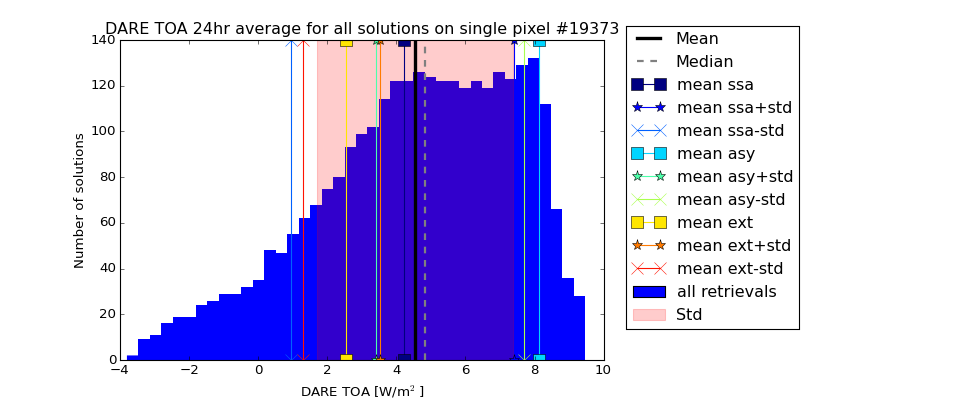

In [99]:
plt.figure(figsize=(12,5))
plt.hist(dftoa,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x']
io = 0
for i,k in enumerate(['ssa','asy','ext']):
    for jj in [0,1,2]:
        plt.axvline(dftoa[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
    
plt.axvspan(np.mean(dftoa)-np.std(dftoa), np.mean(dftoa)+np.std(dftoa), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA 24hr average for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)

plt.savefig(fp+'plot\\DARE_TOA_24h_selected_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


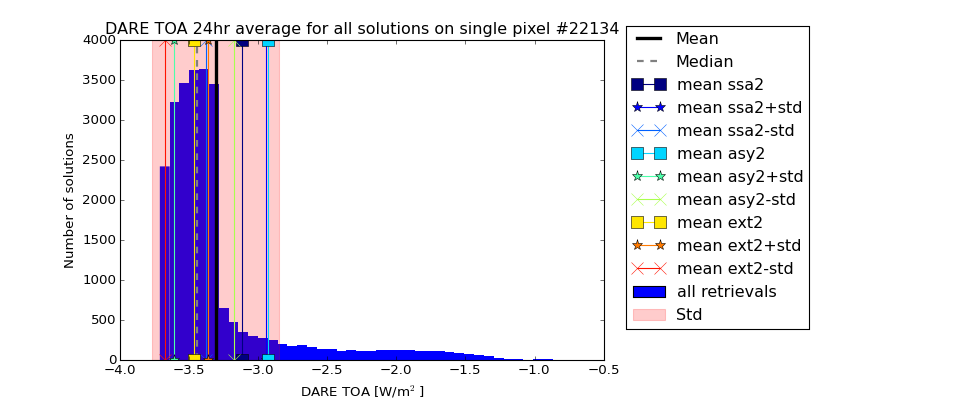

In [100]:
plt.figure(figsize=(12,5))
plt.hist(dftoa2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dftoa2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dftoa2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x']
io = 0
for i,k in enumerate(['ssa2','asy2','ext2']):
    for jj in [0,1,2]:
        plt.axvline(dftoa2[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
    
plt.axvspan(np.mean(dftoa2)-np.std(dftoa2), np.mean(dftoa2)+np.std(dftoa2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE TOA [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE TOA 24hr average for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)

plt.savefig(fp+'plot\\DARE_TOA_24h_selected_{num}.png'.format(num=num2),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


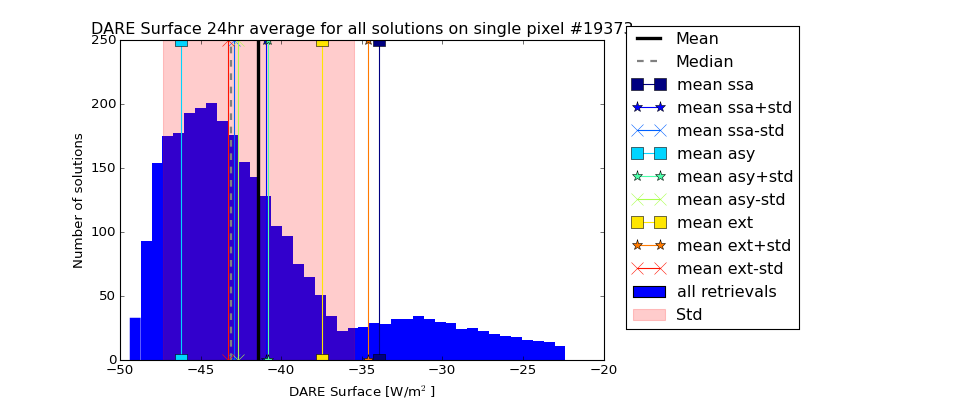

In [101]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x']
io = 0
for i,k in enumerate(['ssa','asy','ext']):
    for jj in [0,1,2]:
        plt.axvline(dfsfc[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
    
plt.axvspan(np.mean(dfsfc)-np.std(dfsfc), np.mean(dfsfc)+np.std(dfsfc), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface 24hr average for all solutions on single pixel #{}'.format(num))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)

plt.savefig(fp+'plot\\DARE_SFC_24h_selected_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


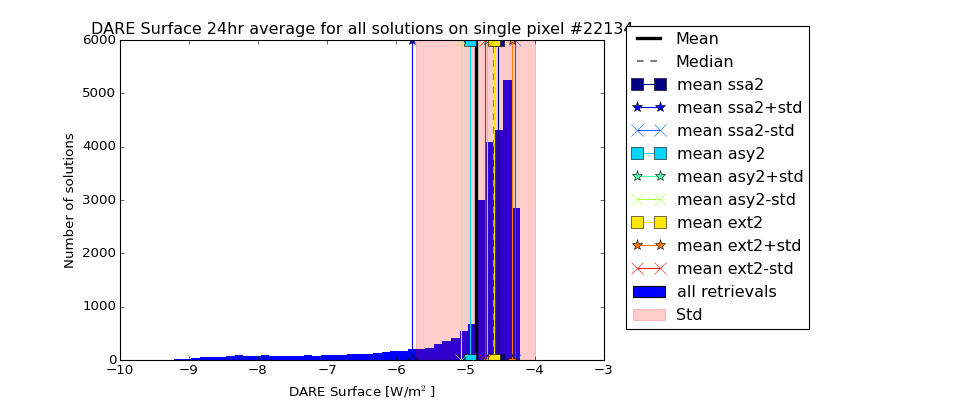

In [102]:
plt.figure(figsize=(12,5))
plt.hist(dfsfc2,bins=40,alpha=1.0,edgecolor='None',label='all retrievals')
plt.axvline(np.mean(dfsfc2),color='k',lw=3,label='Mean')
plt.axvline(np.median(dfsfc2),color='grey',ls='--',lw=2,label='Median')
cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x']
io = 0
for i,k in enumerate(['ssa2','asy2','ext2']):
    for jj in [0,1,2]:
        plt.axvline(dfsfc2[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
    
plt.axvspan(np.mean(dfsfc2)-np.std(dfsfc2), np.mean(dfsfc2)+np.std(dfsfc2), alpha=0.2, color='red',label='Std')

plt.xlabel('DARE Surface [W/m$^2$]')
plt.ylabel('Number of solutions')
plt.title('DARE Surface 24hr average for all solutions on single pixel #{}'.format(num2))

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])

plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)

plt.savefig(fp+'plot\\DARE_SFC_24h_selected_{num}.png'.format(num=num2),dpi=600,transparent=True)

## Print out the representative DARE

In [113]:
print 'DARE TOA {}'.format(num)
print 'DARE Mean: \t{}'.format(np.nanmean(dftoa))
print 'DARE mean+std: \t{}'.format(np.nanmean(dftoa)+np.std(dftoa))
print 'DARE mean-std: \t{}'.format(np.nanmean(dftoa)-np.std(dftoa))

io = 0
for i,k in enumerate(['ssa','asy','ext']):
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+': \t{}'.format(dftoa[ii[k][jj]])
        io +=1

DARE TOA 19373
DARE Mean: 	4.53364175253
DARE mean+std: 	7.37597248001
DARE mean-std: 	1.69131102504
mean ssa: 	4.20986111111
mean ssa+std: 	7.40970486111
mean ssa-std: 	0.962135416667
mean asy: 	8.12470486111
mean asy+std: 	3.404375
mean asy-std: 	7.70269097222
mean ext: 	2.53579861111
mean ext+std: 	3.52190972222
mean ext-std: 	1.29710069444


In [114]:
print 'DARE Surface {}'.format(num)
print 'DARE Mean: \t{}'.format(np.nanmean(dfsfc))
print 'DARE mean+std: \t{}'.format(np.nanmean(dfsfc)+np.std(dfsfc))
print 'DARE mean-std: \t{}'.format(np.nanmean(dfsfc)-np.std(dfsfc))

io = 0
for i,k in enumerate(['ssa','asy','ext']):
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+': \t{}'.format(dfsfc[ii[k][jj]])
        io +=1

DARE Surface 19373
DARE Mean: 	-41.4133643699
DARE mean+std: 	-35.473165998
DARE mean-std: 	-47.3535627417
mean ssa: 	-33.9443055556
mean ssa+std: 	-40.9539930556
mean ssa-std: 	-42.9002777778
mean asy: 	-46.2186111111
mean asy+std: 	-40.8323090278
mean asy-std: 	-42.7005729167
mean ext: 	-37.4831944444
mean ext+std: 	-34.6073263889
mean ext-std: 	-43.3092361111


In [111]:
print 'Properties {}: ssa, asy, ext'.format(num)
io = 0
for i,k in enumerate(['ssa','asy','ext']):
    v = locals()[k]
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+\
        ': \t{s} \t{a} \t{e}'.format(s=ssa[ii[k][jj]],a=asy[ii[k][jj]],e=ext[ii[k][jj]])
        io +=1

Properties 19373: ssa, asy, ext
mean ssa: 	0.830692645725 	0.824173172928 	99.3044413304
mean ssa+std: 	0.801010511162 	0.82314409027 	107.831771092
mean ssa-std: 	0.860037729011 	0.74907655044 	133.232429657
mean asy: 	0.786818725296 	0.795443351859 	113.997529842
mean asy+std: 	0.837720724114 	0.768402833111 	117.166401706
mean asy-std: 	0.801010511162 	0.82314409027 	112.913725897
mean ext: 	0.856460873967 	0.794818132798 	119.443775048
mean ext+std: 	0.840614969822 	0.821167042726 	105.48652035
mean ext-std: 	0.857497651167 	0.751225497741 	133.439310451


In [115]:
print 'Properties {}: ssa, asy, ext'.format(num2)
io = 0
for i,k in enumerate(['ssa','asy','ext']):
    v = locals()[k]
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+\
        ': \t{s} \t{a} \t{e}'.format(s=ssa2[ii[k][jj]],a=asy2[ii[k][jj]],e=ext2[ii[k][jj]])
        io +=1

Properties 22134: ssa, asy, ext
mean ssa: 	0.986320503213 	0.740875477934 	65.8580559573
mean ssa+std: 	0.985789512402 	0.736405200661 	62.2651067908
mean ssa-std: 	0.985948779574 	0.737746536202 	61.1498403429
mean asy: 	0.986327444752 	0.740933885119 	62.8468617143
mean asy+std: 	0.986138499957 	0.739343780825 	59.8723779313
mean asy-std: 	0.985765657155 	0.736204256332 	65.378167682
mean ext: 	0.986312662973 	0.740809507945 	60.1141385611
mean ext+std: 	0.986327781149 	0.740936715602 	67.3391820748
mean ext-std: 	0.985980929746 	0.738017249847 	63.8010588156


In [116]:
print 'DARE TOA {}'.format(num2)
print 'DARE Mean: \t{}'.format(np.nanmean(dftoa2))
print 'DARE mean+std: \t{}'.format(np.nanmean(dftoa2)+np.std(dftoa2))
print 'DARE mean-std: \t{}'.format(np.nanmean(dftoa2)-np.std(dftoa2))

io = 0
for i,k in enumerate(['ssa2','asy2','ext2']):
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+': \t{}'.format(dftoa2[ii[k][jj]])
        io +=1

DARE TOA 22134
DARE Mean: 	-3.30813839236
DARE mean+std: 	-2.84836606576
DARE mean-std: 	-3.76791071896
mean ssa2: 	-3.11475694444
mean ssa2+std: 	-2.94326388889
mean ssa2-std: 	-3.37616319444
mean asy2: 	-2.92605902778
mean asy2+std: 	-3.61024305556
mean asy2-std: 	-3.17302083333
mean ext2: 	-3.46086805556
mean ext2+std: 	-3.3609375
mean ext2-std: 	-3.67581597222


In [117]:
print 'DARE Surface {}'.format(num2)
print 'DARE Mean: \t{}'.format(np.nanmean(dfsfc2))
print 'DARE mean+std: \t{}'.format(np.nanmean(dfsfc2)+np.std(dfsfc2))
print 'DARE mean-std: \t{}'.format(np.nanmean(dfsfc2)-np.std(dfsfc2))

io = 0
for i,k in enumerate(['ssa2','asy2','ext2']):
    for jj in [0,1,2]:
        print str_names[jj].format(nm=k)+': \t{}'.format(dfsfc2[ii[k][jj]])
        io +=1

DARE Surface 22134
DARE Mean: 	-4.85165741695
DARE mean+std: 	-3.99506474986
DARE mean-std: 	-5.70825008405
mean ssa2: 	-4.52336805556
mean ssa2+std: 	-5.77685763889
mean ssa2-std: 	-4.28845486111
mean asy2: 	-4.93199652778
mean asy2+std: 	-4.68598958333
mean asy2-std: 	-5.0578125
mean ext2: 	-4.59213541667
mean ext2+std: 	-4.31980902778
mean ext2-std: 	-4.72217013889


# Inverse link from mean DARE to input properties

In [121]:
ii['DARE_TOA'] = [np.argmin(abs(dftoa-np.nanmean(dftoa))),
                 np.argmin(abs(dftoa-np.nanmean(dftoa)+np.std(dftoa))),
                 np.argmin(abs(dftoa-np.nanmean(dftoa)-np.std(dftoa))),
                 np.argmin(abs(dftoa-np.nanmedian(dftoa)))]
ii['DARE_SFC'] = [np.argmin(abs(dfsfc-np.nanmean(dfsfc))),
                 np.argmin(abs(dfsfc-np.nanmean(dfsfc)+np.std(dfsfc))),
                 np.argmin(abs(dfsfc-np.nanmean(dfsfc)-np.std(dfsfc))),
                 np.argmin(abs(dftoa-np.nanmedian(dfsfc)))]
ii['DARE2_TOA'] = [np.argmin(abs(dftoa2-np.nanmean(dftoa2))),
             np.argmin(abs(dftoa2-np.nanmean(dftoa2)+np.std(dftoa2))),
             np.argmin(abs(dftoa2-np.nanmean(dftoa2)-np.std(dftoa2))),
                 np.argmin(abs(dftoa-np.nanmedian(dftoa2)))]
ii['DARE2_SFC'] = [np.argmin(abs(dfsfc2-np.nanmean(dfsfc2))),
             np.argmin(abs(dfsfc2-np.nanmean(dfsfc2)+np.std(dfsfc2))),
             np.argmin(abs(dfsfc2-np.nanmean(dfsfc2)-np.std(dfsfc2))),
                 np.argmin(abs(dftoa-np.nanmedian(dfsfc2)))]

## now plot the input with the linked DARE properties

In [131]:
str_names = ['mean {nm}','mean {nm}-std','mean {nm}+std','median {nm}']

<IPython.core.display.Javascript object>


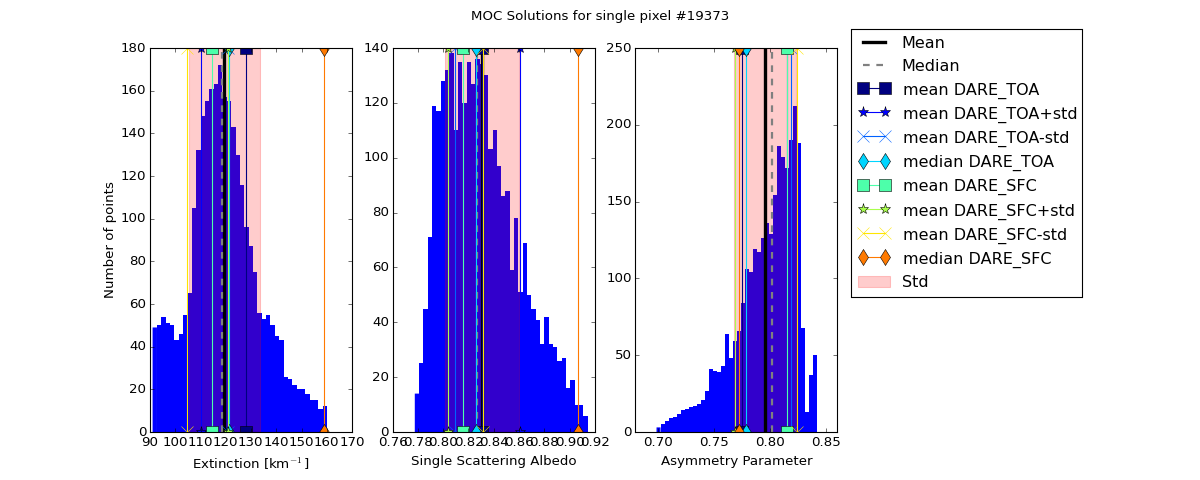

In [137]:
fig,ax = plt.subplots(1,4,figsize=(15,6))

ax[0].hist(ext,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext)-np.std(ext), np.mean(ext)+np.std(ext), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x','d']
io = 0
for i,k in enumerate(['DARE_TOA','DARE_SFC']):
    for jj in [0,1,2,3]:
        ax[0].axvline(ext[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1

ax[1].hist(ssa,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa),color='k',lw=3)
ax[1].axvline(np.median(ssa),color='grey',ls='--',lw=2)
ax[1].axvspan(np.mean(ssa)-np.std(ssa), np.mean(ssa)+np.std(ssa), alpha=0.2, color='red')
ax[1].set_xlabel('Single Scattering Albedo')

io = 0
for i,k in enumerate(['DARE_TOA','DARE_SFC']):
    for jj in [0,1,2,3]:
        ax[1].axvline(ssa[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
#plt.legend(bbox_to_anchor=(1.03,2.07),loc=2,ncol=1)

ax[2].hist(asy,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy)-np.std(asy), np.mean(asy)+np.std(asy), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

io = 0
for i,k in enumerate(['DARE_TOA','DARE_SFC']):
    for jj in [0,1,2,3]:
        ax[2].axvline(asy[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num))

fig.delaxes(ax[3])

#plt.legend(loc=2,frameon=False)
plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_linked_{num}.png'.format(num=num),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


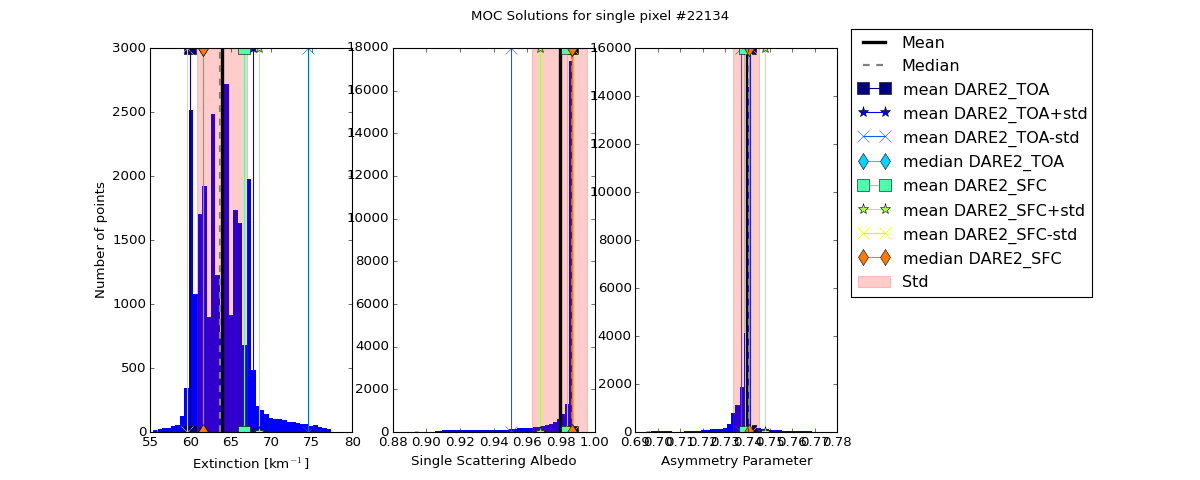

In [138]:
fig,ax = plt.subplots(1,4,figsize=(15,6))

ax[0].hist(ext2,bins=40,edgecolor='None')
ax[0].axvline(np.mean(ext2),color='k',lw=3,label='Mean')
ax[0].axvline(np.median(ext2),color='grey',ls='--',lw=2,label='Median')
ax[0].axvspan(np.mean(ext2)-np.std(ext2), np.mean(ext2)+np.std(ext2), alpha=0.2, color='red',label='Std')
ax[0].set_ylabel('Number of points')
ax[0].set_xlabel('Extinction [km$^{{-1}}$]')

cs = cm.jet(np.arange(9)/9.0)
ms = ['s','*','x','d']
io = 0
for i,k in enumerate(['DARE2_TOA','DARE2_SFC']):
    for jj in [0,1,2,3]:
        ax[0].axvline(ext2[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1

ax[1].hist(ssa2,bins=40,edgecolor='None')
ax[1].axvline(np.mean(ssa2),color='k',lw=3)
ax[1].axvline(np.median(ssa2),color='grey',ls='--',lw=2)
ax[1].axvspan(np.mean(ssa2)-np.std(ssa2), np.mean(ssa2)+np.std(ssa2), alpha=0.2, color='red')
ax[1].set_xlabel('Single Scattering Albedo')

io = 0
for i,k in enumerate(['DARE2_TOA','DARE2_SFC']):
    for jj in [0,1,2,3]:
        ax[1].axvline(ssa2[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1
#plt.legend(bbox_to_anchor=(1.03,2.07),loc=2,ncol=1)

ax[2].hist(asy2,bins=40,edgecolor='None')
ax[2].axvline(np.mean(asy2),color='k',lw=3,label='Mean')
ax[2].axvline(np.median(asy2),color='grey',ls='--',lw=2,label='Median')
ax[2].axvspan(np.mean(asy2)-np.std(asy2), np.mean(asy2)+np.std(asy2), alpha=0.2, color='red',label='Std')
ax[2].set_xlabel('Asymmetry Parameter')

io = 0
for i,k in enumerate(['DARE2_TOA','DARE2_SFC']):
    for jj in [0,1,2,3]:
        ax[2].axvline(asy2[ii[k][jj]],lw=1,label=str_names[jj].format(nm=k),
                    ls='-',color=tuple(cs[io,:]),marker=ms[jj],ms=10)
        io +=1

fig.suptitle('MOC Solutions for single pixel #{num}'.format(num=num2))

fig.delaxes(ax[3])

#plt.legend(loc=2,frameon=False)
plt.legend(bbox_to_anchor=(1.03,1.07),loc=2,ncol=1)
plt.savefig(fp+'\\plot\\MOC_solutions_hist_linked_{num}.png'.format(num=num2),dpi=600,transparent=True)